In [1]:
import pandas as pd
Edata=pd.read_csv('/content/Employee_with_Salary.csv')

In [2]:
Edata.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Salary,role
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,37199.98,Support Engineer
1,Bachelors,2013,Pune,1,28,Female,No,3,1,17287.43,Data Analyst
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,38597.88,Support Engineer
3,Masters,2016,Bangalore,3,27,Male,No,5,1,38187.45,Software Engineer
4,Masters,2017,Pune,3,24,Male,Yes,2,1,33818.96,Software Engineer


In [3]:
Edata.tail()


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Salary,role
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0,37315.79,Support Engineer
4649,Masters,2013,Pune,2,37,Male,No,2,1,28328.96,Full Stack Developer
4650,Masters,2018,New Delhi,3,27,Male,No,5,1,38107.42,Software Engineer
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0,34921.91,Support Engineer
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0,35963.14,Support Engineer


In [4]:
print(Edata.role.value_counts())

role
Support Engineer        2885
QA Tester                543
Software Engineer        462
Full Stack Developer     355
Research Scientist       179
Data Analyst             173
Business Analyst          56
Name: count, dtype: int64


In [5]:
for col in Edata.columns:
    if Edata[col].astype(str).str.contains(r'^\s*\?\s*$', regex=True).any():
        print(f"Column '{col}' contains '?' values.")
    else:
      print("No ? signs")
      break



No ? signs


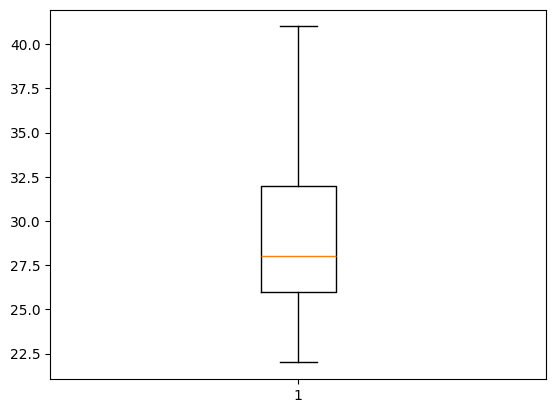

In [6]:
import matplotlib.pyplot as plt
plt.boxplot(Edata['Age'])
plt.show()


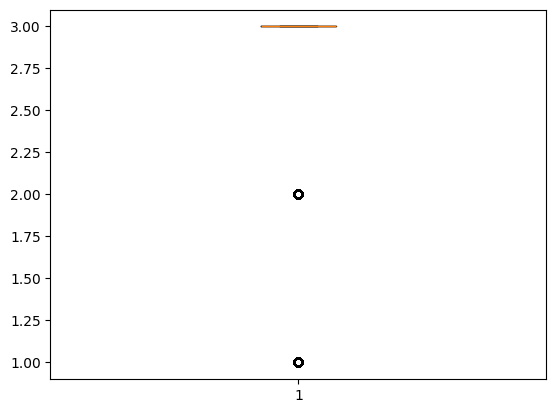

In [7]:
plt.boxplot(Edata['PaymentTier'])
plt.show()

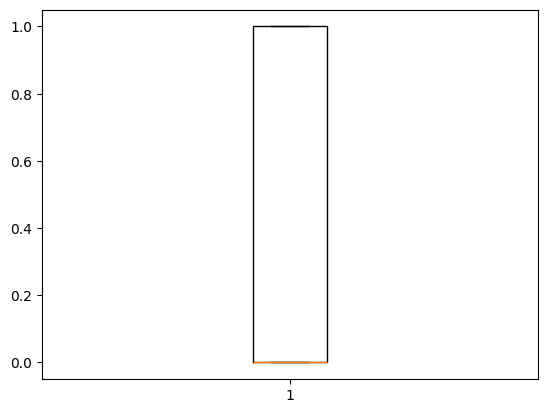

In [8]:
plt.boxplot(Edata['LeaveOrNot'])
plt.show()

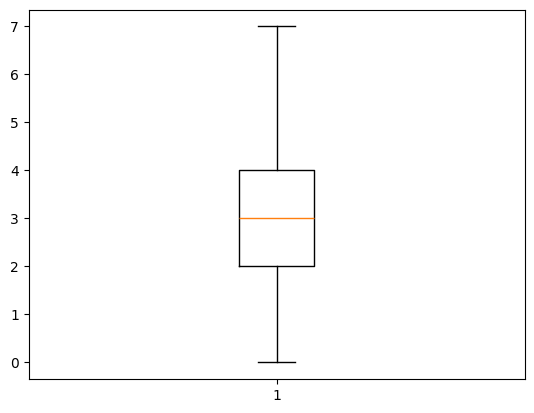

In [9]:
plt.boxplot(Edata['ExperienceInCurrentDomain'])
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
Edata['role']=encoder.fit_transform(Edata['role']) #7 categories   0,1, 2, 3, 4, 5, 6,
Edata['Education']=encoder.fit_transform(Edata['Education'])   #3 categories 0, 1, 2
Edata['City']=encoder.fit_transform(Edata['City'])
Edata['Gender']=encoder.fit_transform(Edata['Gender'])      #5 categories  0, 1, 2, 3, 4
Edata['EverBenched']=encoder.fit_transform(Edata['EverBenched'])


In [11]:
Edata

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Salary,role
0,0,2017,0,3,34,1,0,0,0,37199.98,6
1,0,2013,2,1,28,0,0,3,1,17287.43,1
2,0,2014,1,3,38,0,0,2,0,38597.88,6
3,1,2016,0,3,27,1,0,5,1,38187.45,5
4,1,2017,2,3,24,1,1,2,1,33818.96,5
...,...,...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0,37315.79,6
4649,1,2013,2,2,37,1,0,2,1,28328.96,2
4650,1,2018,1,3,27,1,0,5,1,38107.42,5
4651,0,2012,0,3,30,1,1,2,0,34921.91,6


In [12]:
x = Edata.drop('Salary', axis=1)
y = Edata['Salary']
x

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,role
0,0,2017,0,3,34,1,0,0,0,6
1,0,2013,2,1,28,0,0,3,1,1
2,0,2014,1,3,38,0,0,2,0,6
3,1,2016,0,3,27,1,0,5,1,5
4,1,2017,2,3,24,1,1,2,1,5
...,...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0,6
4649,1,2013,2,2,37,1,0,2,1,2
4650,1,2018,1,3,27,1,0,5,1,5
4651,0,2012,0,3,30,1,1,2,0,6


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


models = {
"LinearRegression": LinearRegression(),
"RandomForest": RandomForestRegressor(),
"KNN": KNeighborsRegressor(),
"GradientBoosting": GradientBoostingRegressor()
}


results = {}

for name, model in models.items():
  pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('model', model)
  ])

  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  results[name] = r2
  print(f"{name}:")
  print(f"  R2 Score: {r2:.4f}")
  print(f"  Mean Squared Error: {mse:.4f}")
  print('-' * 40)
for name, model in models.items():
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  r2 = r2_score(y_test, preds)
  results[name] = r2
  print(f"{name}: R² Score = {r2:.4f}")


best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with R² score = {results[best_model_name]:.4f}")

LinearRegression:
  R2 Score: 0.9966
  Mean Squared Error: 105599.2719
----------------------------------------
RandomForest:
  R2 Score: 0.9980
  Mean Squared Error: 62922.2190
----------------------------------------
KNN:
  R2 Score: 0.9862
  Mean Squared Error: 427293.9043
----------------------------------------
GradientBoosting:
  R2 Score: 0.9966
  Mean Squared Error: 104075.9863
----------------------------------------
LinearRegression: R² Score = 0.9966
RandomForest: R² Score = 0.9980
KNN: R² Score = 0.9485
GradientBoosting: R² Score = 0.9966

✅ Best model: RandomForest with R² score = 0.9980


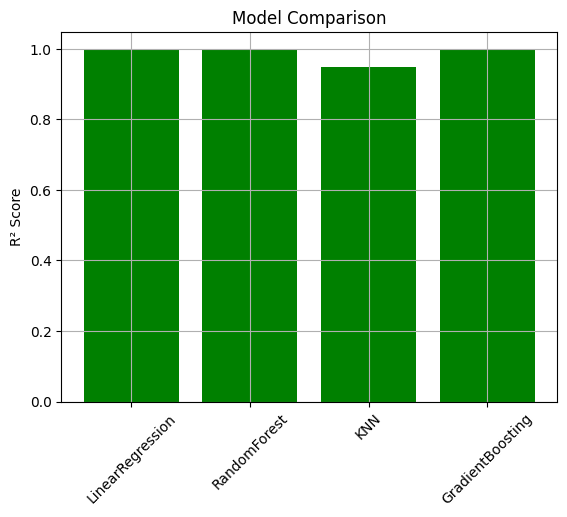

In [19]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='green')
plt.ylabel('R² Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [20]:
import pickle

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    with open(f"{name}_model.pkl", "wb") as f:
        pickle.dump(pipe, f)


In [21]:
import numpy as np

model_name = "RandomForest_model.pkl"
with open(model_name, "rb") as f:
    model = pickle.load(f)


sample_input = np.array([[0, 2017, 0, 3, 34, 1, 0, 0, 0, 6]])

predicted_salary = model.predict(sample_input)
print(f"Predicted Salary: ₹{predicted_salary[0]:.2f}")


Predicted Salary: ₹37204.40


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
from google.colab import files

csv = Edata.to_csv(index=False).encode('utf-8')

with open('Edata.csv', 'wb') as f:
    f.write(csv)
files.download('Edata.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>